<a href="https://colab.research.google.com/github/prat-degwekar/bd/blob/master/decision_tree_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install quandl

  Running setup.py bdist_wheel for inflection ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [0]:
Epsilon = 45

def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [4]:
# Pull Kraken BTC price exchange data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

btc_usd_price_kraken.head()

Cached BCHARTS/KRAKENUSD at BCHARTS-KRAKENUSD.pkl


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [5]:
#create classes

classes = np.zeros((btc_usd_price_kraken['Volume (Currency)'].size, 1))

print (classes.size)

for i in range (1, classes.size):
    
    if ( btc_usd_price_kraken['Open'][i] > btc_usd_price_kraken['Open'][i-1] ) :
        classes[i] = 1
    else :
        classes[i] = 0

1829


Text(0,0.5,'Opening value of Bitcoin')

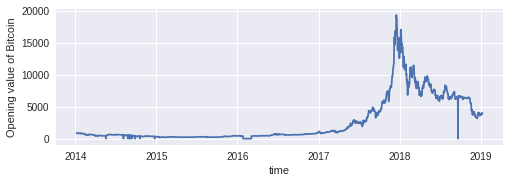

In [6]:
plt.subplot(211)

plt.plot( btc_usd_price_kraken['Open'] )
#indices =  np.arange(btc_usd_price_kraken['Volume (Currency)'].size)
#plt.plot( btc_usd_price_kraken['Volume (Currency)'], indices)
plt.xlabel('time')
plt.ylabel( 'Opening value of Bitcoin' )

In [7]:
#do classification

X_train, X_test, y_train, y_test = train_test_split( btc_usd_price_kraken['Open'].values.reshape(-1,1), classes)

#X - data, y - class

DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

score = DTC.score(X_test, y_test)

print("score calculated from api call : " , score)

predict = DTC.predict(X_test)

# export_graphviz(DTC, out_file = "Decision_tree.dot")

score calculated from api call :  0.5458515283842795


AUC Score (Area Under Curve) :  0.5487973035085031


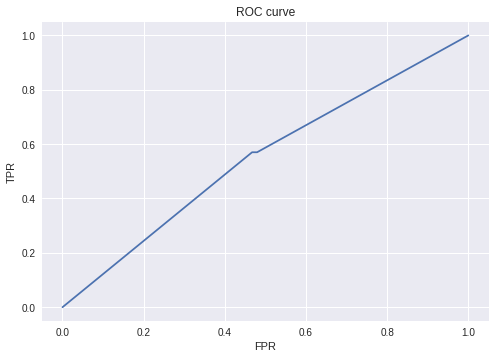

In [12]:
# For AUC
predictions = DTC.predict_proba(X_test)
print ( "AUC Score (Area Under Curve) : ", roc_auc_score(y_test, predictions[:,1]) )

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

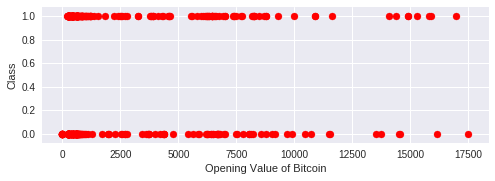

In [13]:
plt.subplot(212)

plt.scatter(X_test, predict, color = 'red')
#plt.scatter(btc_usd_price_kraken['Open'], classes, color = 'red')

plt.xlabel("Opening Value of Bitcoin")
plt.ylabel("Class")

plt.show()

In [15]:
# metrics

errors = np.zeros((1,1))

#positive -> 1, negative -> 0

conf_mat = confusion_matrix( y_test, predict )

tn, fp, fn, tp = conf_mat.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

precision = tp / ( tp + fp )
recall = sensitivity

f1_score = 2 * precision * recall / ( precision + recall )

print ( "specificity = " , specificity)
print ( "sensitivity = " , sensitivity)
print ( "precision = " , precision)
print ( "recall = " , recall)
print ( "F1 score = " , f1_score)
print ( "AUC Score (Area Under Curve) : ", roc_auc_score(y_test, predictions[:,1]) )

specificity =  0.5245901639344263
sensitivity =  0.5700934579439252
precision =  0.5126050420168067
recall =  0.5700934579439252
F1 score =  0.5398230088495575
AUC Score (Area Under Curve) :  0.5487973035085031
